In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sherpa
import sherpa.algorithms.bayesian_optimization as bayesian_optimization
import GPyOpt
import scipy
%matplotlib inline

# Objective Function

In [2]:
def f(x, sd=0):
    y = (x-3)**2 + 10.
    if sd == 0:
        return y
    else:
        return y + np.random.normal(loc=0., scale=sd, size=np.array(x).shape)

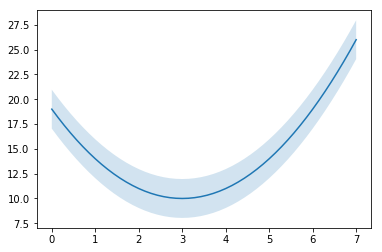

In [3]:
x = np.linspace(0, 7, 50, endpoint=True)
fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.fill_between(x, f(x)-1.96*1, f(x)+1.96*1, alpha=0.2)

# GPyOpt with n=1 (no noise)

In [4]:
bounds = [{'name': 'x', 'type': 'continuous', 'domain': (1,6)}]

In [5]:
myBopt = GPyOpt.methods.BayesianOptimization(f=lambda x: f(x, sd=0),            # function to optimize       
                                             domain=bounds,        # box-constraints of the problem
                                             acquisition_type='EI',
                                             exact_feval = False)

In [6]:
# Run the optimization
max_iter = 100     # evaluation budget
max_time = 60     # time budget 
eps      = 10e-6  # Minimum allows distance between the las two observations

myBopt.run_optimization(max_iter, max_time, eps) 

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


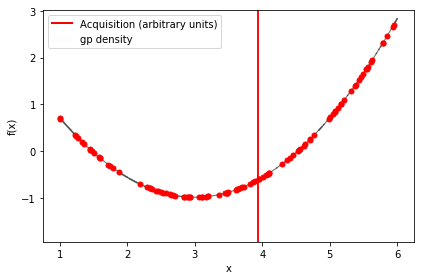

In [7]:
myBopt.plot_acquisition()

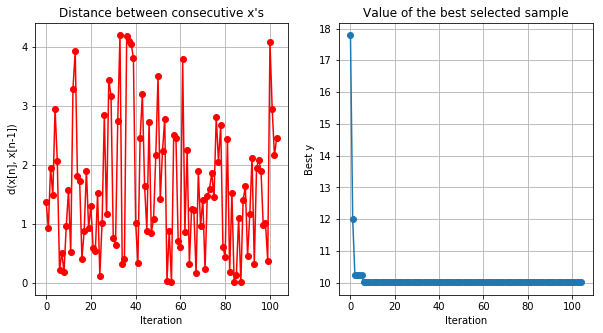

In [8]:
myBopt.plot_convergence()

In [9]:
X, Y = myBopt.get_evaluations()
print(X[np.argmin(Y)])

[3.06566026]


In [10]:
Ymean, Yvar = myBopt.model.model.predict(X)
idx = np.argmin(Ymean)
print("X=", X[idx], " Y=", Ymean[idx])

X= [3.06566026]  Y= [-0.97775102]


# GPyOpt with noise (sd=1) and one evaluation

In [11]:
bounds = [{'name': 'x', 'type': 'continuous', 'domain': (1,6)}]

In [60]:
myBopt = GPyOpt.methods.BayesianOptimization(f=lambda x: f(x, sd=1),            # function to optimize       
                                             domain=bounds,        # box-constraints of the problem
                                             acquisition_type='EI',
                                             exact_feval = False)

In [61]:
# Run the optimization
max_iter = 50     # evaluation budget
max_time = 60     # time budget 
eps      = 10e-6  # Minimum allows distance between the las two observations

myBopt.run_optimization(max_iter, max_time, eps) 

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


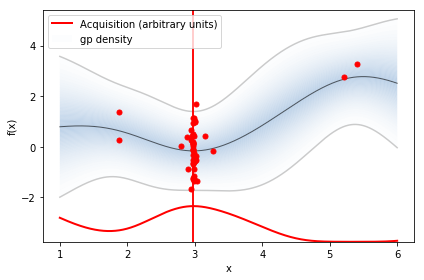

In [62]:
myBopt.plot_acquisition()

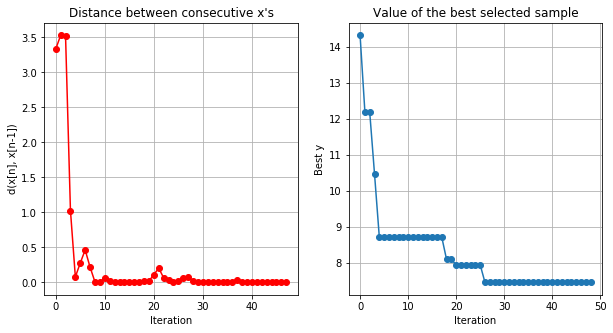

In [63]:
myBopt.plot_convergence()

In [67]:
X, Y = myBopt.get_evaluations()
print(X[np.argmin(Y)])

[2.94129496]


In [69]:
Ymean, Yvar = myBopt.model.model.predict(X)
idx = np.argmin(Ymean)
print("X=", X[idx][0], " Y=", Ymean[idx])

X= 2.9794414939697758  Y= [-0.16524735]


### Run multiple times max_iter=50

In [4]:
# max_iter = 50     # evaluation budget
# max_time = 60     # time budget 
# eps      = 10e-6  # Minimum allows distance between the las two observations

# num_runs = 100

# mineval = []
# minpredicted = []

# for _ in range(num_runs):
#     myBopt = GPyOpt.methods.BayesianOptimization(f=lambda x: f(x, sd=1),            # function to optimize       
#                                                  domain=bounds,        # box-constraints of the problem
#                                                  acquisition_type='EI',
#                                                  exact_feval = False)
#     myBopt.run_optimization(max_iter, max_time, eps) 
#     X, Y = myBopt.get_evaluations()
#     mineval.append(X[np.argmin(Y)][0])
#     Ymean, Yvar = myBopt.model.model.predict(X)
#     idx = np.argmin(Ymean)
#     minpredicted.append(X[idx][0])
# np.savez('gpyopt_max_iter_50_sd_1.npz', mineval=np.array(mineval), minpredicted=np.array(minpredicted))

In [5]:
data = np.load('gpyopt_max_iter_50_sd_1.npz')
mineval = data['mineval']
minpredicted = data['minpredicted']

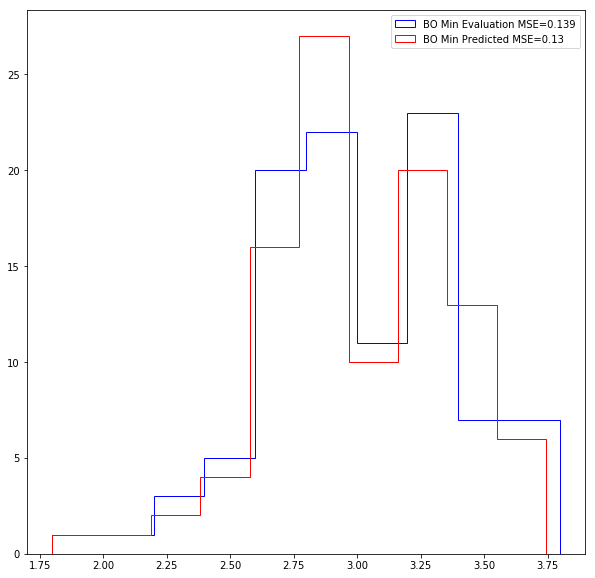

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(mineval, histtype='step', color='b', label='BO Min Evaluation MSE={:.3}'.format(np.mean((np.array(mineval)-3)**2)))
ax.hist(minpredicted, histtype='step', color='r', label='BO Min Predicted MSE={:.3}'.format(np.mean((np.array(minpredicted)-3)**2)))
ax.legend()

# GPyOpt with noise (sd=1) and 10 evaluations

In [8]:
bounds = [{'name': 'x', 'type': 'continuous', 'domain': (1,6)}]

In [9]:
myBopt = GPyOpt.methods.BayesianOptimization(f=lambda x: np.mean([f(x, sd=1) for _ in range(10)]),            # function to optimize       
                                             domain=bounds,        # box-constraints of the problem
                                             acquisition_type='EI',
                                             exact_feval = False)

In [10]:
# Run the optimization
max_iter = 10     # evaluation budget
max_time = 60     # time budget 
eps      = 10e-6  # Minimum allows distance between the las two observations

myBopt.run_optimization(max_iter, max_time, eps) 

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


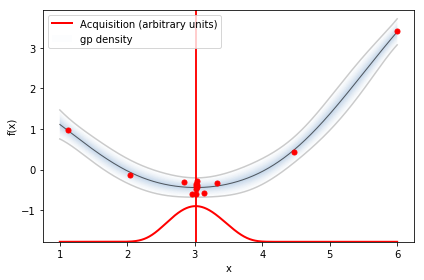

In [11]:
myBopt.plot_acquisition()

In [12]:
X, Y = myBopt.get_evaluations()
print(X[np.argmin(Y)])

[3.01479638]


In [13]:
Ymean, Yvar = myBopt.model.model.predict(X)
idx = np.argmin(Ymean)
print("X=", X[idx], " Y=", Ymean[idx])

X= [3.01562536]  Y= [-0.43900617]


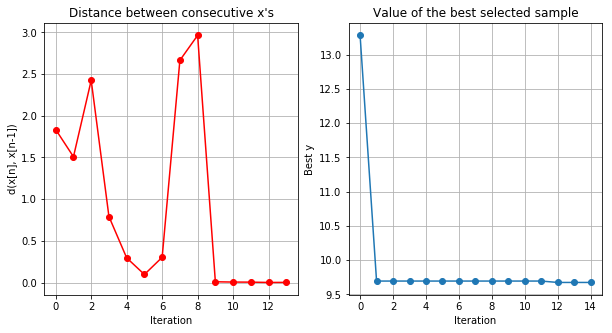

In [14]:
myBopt.plot_convergence()

### Run multiple times with max_iter=20

In [ ]:
# max_iter = 20     # evaluation budget
# max_time = 60     # time budget 
# eps      = 10e-6  # Minimum allows distance between the las two observations

# num_runs = 100

# mineval = []
# minpredicted = []

# for _ in range(num_runs):
#     myBopt = GPyOpt.methods.BayesianOptimization(f=lambda x: np.mean([f(x, sd=1) for _ in range(10)]),            # function to optimize       
#                                                  domain=bounds,        # box-constraints of the problem
#                                                  acquisition_type='EI',
#                                                  exact_feval = False)
#     myBopt.run_optimization(max_iter, max_time, eps) 
#     X, Y = myBopt.get_evaluations()
#     mineval.append(X[np.argmin(Y)][0])
#     Ymean, Yvar = myBopt.model.model.predict(X)
#     idx = np.argmin(Ymean)
#     minpredicted.append(X[idx][0])
# np.savez('gpyopt_max_iter_20_n_10_sd_1.npz', mineval=np.array(mineval), minpredicted=np.array(minpredicted))

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as par

INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


In [15]:
data = np.load('gpyopt_max_iter_20_n_10_sd_1.npz')
mineval_n10 = data['mineval']
minpredicted_n10 = data['minpredicted']

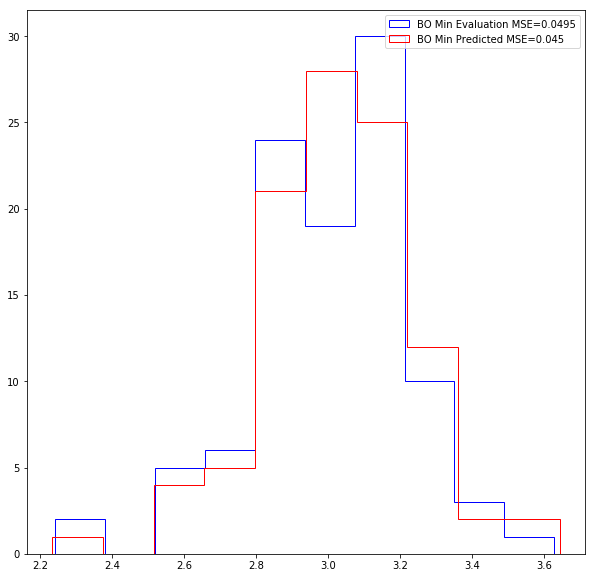

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(mineval_n10, histtype='step', color='b', label='BO Min Evaluation MSE={:.3}'.format(np.mean((mineval_n10-3)**2)))
ax.hist(minpredicted_n10, histtype='step', color='r', label='BO Min Predicted MSE={:.3}'.format(np.mean((minpredicted_n10-3)**2)))
ax.legend()